# Homework 3: EDA of Bike Sharing

## Introduction

This homework has four goals: 

* to learn how to read plain text delimited data into pandas
* to gain experience preparing data for analysis
* to use EDA to learn about your data 
* to learn how to make informative plots

This assignment includes both specific tasks to perform and open-ended questions to investigate. The open-ended questions ask you to think creatively and critically in how you plot the data and summarize information gleaned from these visualizations.

There are 4 parts to this assignment: 
- data preparation
- exploring the distribution of riders
- exploring the relationship between time and rider counts
- and exploring the relationship between weather and rider counts. 

The data preparation section gives you specific tasks to perform. Then in each of the next three sections, you are asked to create 2 plots. The first plot is described in some detail and the second plot is one of your choosing.

Be sure to choose a plot that provides additional information about the distributions and relationships in the data. Remember that we are interested in how ride sharing works.  Therefore, plots that, for example examine the weather in DC *without reference to ride sharing are not interesting*.

**Be sure that your plots have informative titles, axis labels, and legends.**

In [47]:
# Run this cell to set up your notebook

import seaborn as sns
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

from IPython.display import display, Latex, Markdown
from client.api.notebook import Notebook
ok = Notebook('hw3.ok')


Assignment: Homework 3
OK, version v1.12.10



In [2]:
ok.auth(force=True) # Change False to True if you are getting errors authenticating


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: IvGbxtoc7t54P8m5j2mNKlnCwi1mvD
Successfully logged in as devyndonahue@berkeley.edu


## Loading Bike Sharing Data
The data we are exploring is data on bike sharing in Washington D.C and can be found in `data/bikeshare.txt`.

The variables in this data frame are defined as:
```
instant: record index
dteday : date
season : season (1:spring, 2:summer, 3:fall, 4:winter)
yr : year (0: 2011, 1:2012)
mnth : month ( 1 to 12)
hr : hour (0 to 23)
holiday : whether day is holiday or not
weekday : day of the week
workingday : if day is neither weekend nor holiday
weathersit :
    1: Clear or partly cloudy
    2: Mist + clouds
    3: Light Snow or Rain
    4: Heavy Rain or Snow
temp : Normalized temperature in Celsius (divided by 41)
atemp: Normalized feeling temperature in Celsius (divided by 50)
hum: Normalized percent humidity (divided by 100)
windspeed: Normalized wind speed (divided by 67)
casual: count of casual users
registered: count of registered users
cnt: count of total rental bikes including casual and registered
```

In the following we load the raw data into the dataframe `bike`. 

In [48]:
bike = pd.read_csv("data/bikeshare.txt")
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Data Preparation
Many of the variables that are numeric/integer should be factors. These include holiday, weekday, workingday, and weathersit. In the following question we convert these 4 variables to factors and use appropriate labels for the levels. In particular use the 3 letter label, e.g., Sun, Mon, … for weekday. You may simply use yes/no for holiday and workingday. 

In this exercise we will **overwrite the corresponding variables in the data frame.** However be sure to write a comment in your code about the transformation and leave the underlying datafile `data/bikeshare.txt` unmodified.

### Question 1

#### Question 1a (Decoding `holiday`)
Figure out whether a 0 means yes or no for the holiday column of each row (there are fewer holidays than other days). Translate the numeric entry into a `'yes'` or `'no'` and set `num_holidays` equal to the number of entries in the table corresponding to a holiday. 

In [49]:
# Hint: df.replace( ..., inplace=True)
num_holidays = len(bike[bike['holiday']==1])
replace_values= {0: 'no', 1: 'yes'}
holidays= bike.replace({'holiday': replace_values}, inplace=True)

#For this transformation, we replaced the 0's with no's and the 1's with yes's

In [50]:
_ = ok.grade('q01a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/4xr6zV
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1b (Decoding `weekday`, `workingday`, and `weathersit`)


Finish decoding the `weekday`, `workingday`, and `weathersit` fields:

1. **`'weekday'`:** It turns out that Monday is the day with the most holidays.  Use that information to change the `'weekday'` column to use the 3 letter label (`'Sun'`, `'Mon'`, ...) instead of its current numerical values.
1. **`'workingday'`:** Convert to `'yes'` and `'no'`.
1. **`'weathersit'`:** You should replace each value with one of `'Clear'`, `'Mist'`, `'Light'`, or `'Heavy'`.

In [51]:
days= {0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat' }
weather= {1: 'Clear', 2: 'Mist', 3: 'Light', 4: 'Heavy'}
weekdays= bike.replace({'weekday': days}, inplace=True)
workingday= bike.replace({'workingday': {0:'no', 1: 'yes'}}, inplace=True)
weathersit= bike.replace({'weathersit': weather}, inplace=True)

In [52]:
_ = ok.grade('q01b')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/73x9py
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 1c (Computing Daily Total Counts)

The granularity of this data is at the hourly level.  However, for some of the analysis we will also want to compute daily statistics.  In particular, in the next few questions we will be analyzing the number of daily registered and unregistered users.

Construct a table (dataframe) consisting of:
* `'casual'`: total casual riders for each day
* `'registered'`: total registered riders for each day
* `'workingday'`: whether that day is a working day or not (yes or no)

You will want to use the `groupby` and `aggregate` functions as well as the `sum` and `last` aggregation operators. 

In [53]:
daily_counts = pd.DataFrame()#columns = ['casual', 'registered', 'workingday'])

grouped = bike.groupby('dteday').sum()
work = bike.groupby('dteday').last()
new = grouped.drop(['instant', 'season', 'yr', 'mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'registered', 'cnt'], axis=1)
daily_counts['workingday'] = work['workingday']
daily_counts['casual'] = new['casual']
dropped = grouped.drop(['instant', 'season', 'yr', 'mnth', 'hr', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'cnt'], axis=1)
daily_counts['registered'] = dropped['registered']
daily_counts

,workingday,casual,registered
dteday,,,
2011-01-01,no,331,654
2011-01-02,no,131,670
2011-01-03,yes,120,1229
2011-01-04,yes,108,1454
2011-01-05,yes,82,1518
2011-01-06,yes,88,1518
2011-01-07,yes,148,1362
2011-01-08,no,68,891
2011-01-09,no,54,768


In [54]:
_ = ok.grade('q01c')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/82y3Mg
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



## Exploring the Distribution of Riders

Let's begin by comparing the distribution of the daily counts of casual and registered riders.  

### Question 2
#### Question 2a

Use the `sns.distplot` function to create a plot that overlays the distribution of the daily counts of casual and registered users. The temporal granularity of the records should be daily counts, which you should have after completing question 1c.

[<matplotlib.text.Text at 0x11c29e5f8>, <matplotlib.text.Text at 0x11c2973c8>]

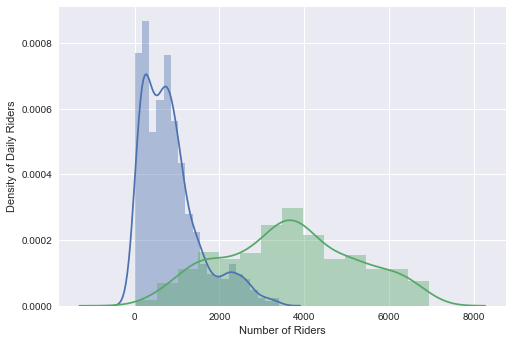

In [55]:
x= daily_counts['casual']
y= daily_counts['registered']
ax= sns.distplot(x)
sns.distplot(y)
ax.set(xlabel= 'Number of Riders', ylabel= 'Density of Daily Riders')

#### Question 2b

Describe the differences you notice between the density curves for casual and registered riders. Be sure to consider features such as modes, symmetry and skewness, tails, gaps and unusual values. Also comment on the spread of the distributions.

In [56]:
q2b_answer = r"""

The registered riders is a mostly symmetrical curve, while the casual riders graph is skewed 
to the right. The registered riders has a longer spread while the casual riders has a more 
concise spread. The average daily count of casual riders is a considerab;e amount less than the 
registered riders, very close to 0, but it contains a majority of the data points from 0-2000.
There is an odd drop around the 500 or so mark on the casual riders, where the graph peaks on
either side, but goes down in the middle.

"""

display(Markdown(q2b_answer))



The registered riders is a mostly symmetrical curve, while the casual riders graph is skewed 
to the right. The registered riders has a longer spread while the casual riders has a more 
concise spread. The average daily count of casual riders is a considerab;e amount less than the 
registered riders, very close to 0, but it contains a majority of the data points from 0-2000.
There is an odd drop around the 500 or so mark on the casual riders, where the graph peaks on
either side, but goes down in the middle.



### Question 2c

The density plots do not show us how the daily counts for registered and casual riders vary together. Use `sns.lmplot` to make a scatter plot to investigate the relationship between casual and registered counts. Color the points in the scatterplot according to whether or not the day is working day. There are many points in the scatter plot so make them small  to help with over plotting.

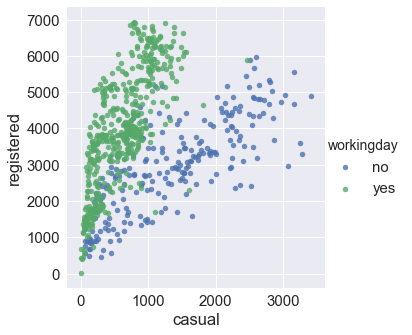

In [57]:
# Make the font size a bit bigger
sns.set(font_scale=1.5)
sns.lmplot('casual', 
           'registered', 
          data=daily_counts, 
          fit_reg=False, 
           hue="workingday", 
           scatter_kws={"marker": "D", 
                        "s": 30})


### Question 2d

What does this scatterplot seem to reveal about the relationship (if any) between casual and registered riders and whether or not the day is on the weekend?
Why might we be concerned with overplotting in examining this relationship? 


In [58]:
q2d_answer = r"""

If it is a workingday, then most of the riders are registered, but if it is a non workingday
then the casual and registered riders increase at a steady rate. There are more casual riders
on non workingdays. Overplotting could be an issue because when the dots are on top of 
eachother or very close to one another and that may make it hard to see the general trend of
the graph.

"""

display(Markdown(q2d_answer))



If it is a workingday, then most of the riders are registered, but if it is a non workingday
then the casual and registered riders increase at a steady rate. There are more casual riders
on non workingdays. Overplotting could be an issue because when the dots are on top of 
eachother or very close to one another and that may make it hard to see the general trend of
the graph.



## Question 3

### Question 3a Bivariate Kernel Density Plot
 
The scatter plot you made in question 2c makes clear the separation between the work days and weekend days.  However, the overplotting
makes it difficult to see the density of the joint counts. To address this
issue, let's try visualizing the data with another technique, the kernel density plot.

You will want to read up on the documentation for `sns.kdeplot` which can be found at https://seaborn.pydata.org/generated/seaborn.kdeplot.html

The result we wish to achieve should be a plot that looks like this:

<img src='bivariate_kde_of_daily_rider_types.png' >

Making this plot can be complicated so we will provide a walkthrough below, feel free to use whatever method you wish however if you do not want to follow the walkthrough.

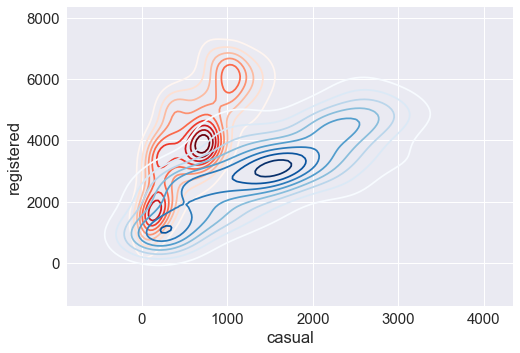

In [59]:
# Set 'ind' to a boolean condition that will allow you to filter daily_counts for rows 
#corresponding to workingdays
ind = daily_counts['workingday'] == 'yes'

# Bivariate KDEs require two data inputs. 
# In this case, we will need the daily counts for casual and registered riders on weekdays
# Hint: use loc and ind to splice out the relevant rows and column (casual/registered)
casual_weekday = daily_counts[daily_counts['workingday'] == 'yes']
casual_weekday = casual_weekday['casual']
registered_weekday= daily_counts[daily_counts['workingday'] == 'yes']
registered_weekday = registered_weekday['registered']
sns.kdeplot(casual_weekday, registered_weekday, cmap= 'Reds')
# User sns.kdeplot to plot the bivariate KDE for weekday rides

# Repeat the same steps above but for rows corresponding to non-workingdays
casual_weekend = daily_counts[daily_counts['workingday'] == 'no']
casual_weekend= casual_weekend['casual']
registered_weekend = daily_counts[daily_counts['workingday'] == 'no']
registered_weekend = registered_weekend['registered']
sns.kdeplot(casual_weekend, registered_weekend, cmap= 'Blues')

#### Question 3b

What does the contour plot reveal about the relationship between casual and registered riders for both weekdays and weekends? How is it an improvement over the scatter plot you created in Q2c?

In [60]:
q3b_answer = r"""

This shows that the most overlap is around 0, and there are more casual riders on the weekend 
than on weekdays. There are more registered riders on the weekdays than on weekends. This is an
improvement over the scatter plot because you can see the data better, and the overlap is 
not as cluttered.

"""

display(Markdown(q3b_answer))



This shows that the most overlap is around 0, and there are more casual riders on the weekend 
than on weekdays. There are more registered riders on the weekdays than on weekends. This is an
improvement over the scatter plot because you can see the data better, and the overlap is 
not as cluttered.



#### Question 3c

As an alternative approach, construct the following set of three plots where the main plot shows the contours of daily counts for registered and casual riders and the two "margin" plots provide the univariate distribution of each of these variables. 

<img src="joint_distribution_of_daily_rider_types.png"/>

You might find `sns.jointplot` helpful. You will want to explore the `kind` parameter in `jointplot` to achieve the plot above. Also, consider using `set_axis_labels` to rename your axes.

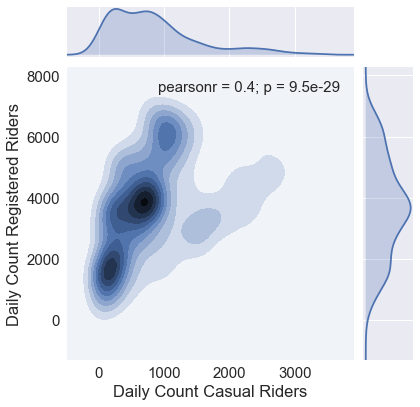

In [61]:
sns.jointplot('casual', 'registered', daily_counts, kind= 'kde'
             ).set_axis_labels('Daily Count Casual Riders','Daily Count Registered Riders')

## Exploring Ride Sharing and Time

### Question 4a

Plot number of riders for each hour of each day in the month of June in 2011. 

Make sure to add descriptive x-axis and y-axis labels and create a legend to distinguish the line for casual riders and the line for registered riders. The end result should look like this:

<img src="june_riders.png" width='800px'/>

In [62]:
bike.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0,0,1,1


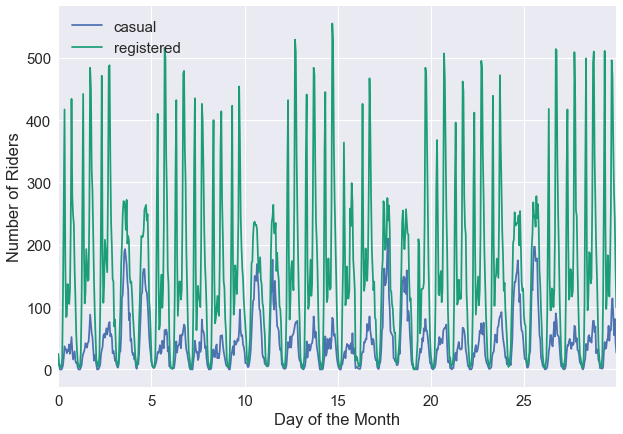

In [63]:
# This makes the plot bigger
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
indexed= bike.reset_index().set_index('dteday').loc['2011-06-01':'2011-06-30']
indexed= indexed.reset_index().set_index((indexed["index"]-indexed['index'].min())/24)
indexed['casual'].plot(x=indexed, y=indexed['casual'], kind='line', legend=True)
indexed['registered'].plot(x=indexed,y=indexed['registered'], kind='line', colormap='Dark2', legend=True)
plt.xlabel('Day of the Month')
plt.ylabel('Number of Riders')


#### Question 4b

This plot has several interesting features. How do the number of casual and registered riders compare for different days of the month? What is an interesting trend and pattern you notice between the lines?

In [64]:
q4b_answer = r"""

There are usually more registered riders when there are less casual riders and vice versa. The casual riders probably
come on the weekends more while the registered riders come during the week. 

"""

display(Markdown(q4b_answer))



There are usually more registered riders when there are less casual riders and vice versa. The casual riders probably
come on the weekends more while the registered riders come during the week. 



## Question 5 (Understanding Daily Patterns)

Let's examine the behavior or riders by plotting the average number of riders for each hour of the day over the entire dataset stratified by rider type.  

Your plot should look like the following:

<img src="diurnal_bikes.png" width="800px"/>

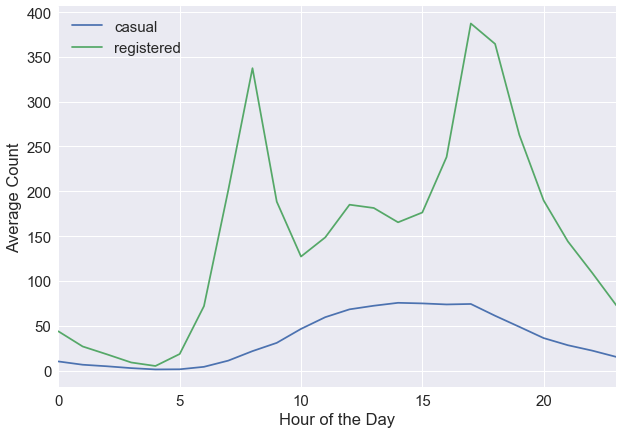

In [65]:
# This makes the plot bigger
plt.figure(figsize=(10, 7))

# This makes the plot bigger
plt.figure(figsize=(10, 7))
day_casual = bike["casual"].groupby(bike["hr"]).aggregate(np.mean)
day_registered = bike["registered"].groupby(bike["hr"]).aggregate(np.mean)

day_casual.plot(legend=True)
day_registered.plot(legend=True)
plt.xlabel('Hour of the Day')
plt.ylabel('Average Count')


#### Question 5b

What can you observe from the plot, what do those peaks mean?

In [66]:
q5b_answer = r"""

There are more registered riders at every hour of the day, and when it peaks that means there are the most riders at
those points of the day. For registered riders, the times when there are most riders are around 8 am and 5 pm. For 
casual riders, the most riders usually come between about 12-5 pm.

"""

display(Markdown(q5b_answer))



There are more registered riders at every hour of the day, and when it peaks that means there are the most riders at
those points of the day. For registered riders, the times when there are most riders are around 8 am and 5 pm. For 
casual riders, the most riders usually come between about 12-5 pm.



## Exploring Ride Sharing and Weather
### Question 6
Now let's examine how the weather is affecting rider's behavior. First let's look at how the proportion of casual riders changes as weather changes.

#### Question 6a
Create a new column `propCasual` in the `bike` dataframe representing the proportion of casual riders comparing to the total number of riders.



In [67]:
bike= bike.assign(propCasual=bike['casual']/bike['cnt'])
bike

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,propCasual
0,1,2011-01-01,1,0,1,0,no,Sat,no,Clear,0.24,0.2879,0.81,0.0000,3,13,16,0.187500
1,2,2011-01-01,1,0,1,1,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,8,32,40,0.200000
2,3,2011-01-01,1,0,1,2,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,5,27,32,0.156250
3,4,2011-01-01,1,0,1,3,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,3,10,13,0.230769
4,5,2011-01-01,1,0,1,4,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,0,1,1,0.000000
5,6,2011-01-01,1,0,1,5,no,Sat,no,Mist,0.24,0.2576,0.75,0.0896,0,1,1,0.000000
6,7,2011-01-01,1,0,1,6,no,Sat,no,Clear,0.22,0.2727,0.80,0.0000,2,0,2,1.000000
7,8,2011-01-01,1,0,1,7,no,Sat,no,Clear,0.20,0.2576,0.86,0.0000,1,2,3,0.333333
8,9,2011-01-01,1,0,1,8,no,Sat,no,Clear,0.24,0.2879,0.75,0.0000,1,7,8,0.125000
9,10,2011-01-01,1,0,1,9,no,Sat,no,Clear,0.32,0.3485,0.76,0.0000,8,6,14,0.571429


In [68]:
_ = ok.grade('q06a')
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Backup... 100% complete
Backup successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/backups/J6n8PP
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



#### Question 6b
In order to examine the relationship between proportion of casual riders and temerature, we can make some bivariate scatterplot using `sns.swarmplot` or `sns.lmplot`. We can even use color/hue to encode the information about day of week. Run the following cells to create such plots. (Plot contains lots of points, so it may a while for it to render)


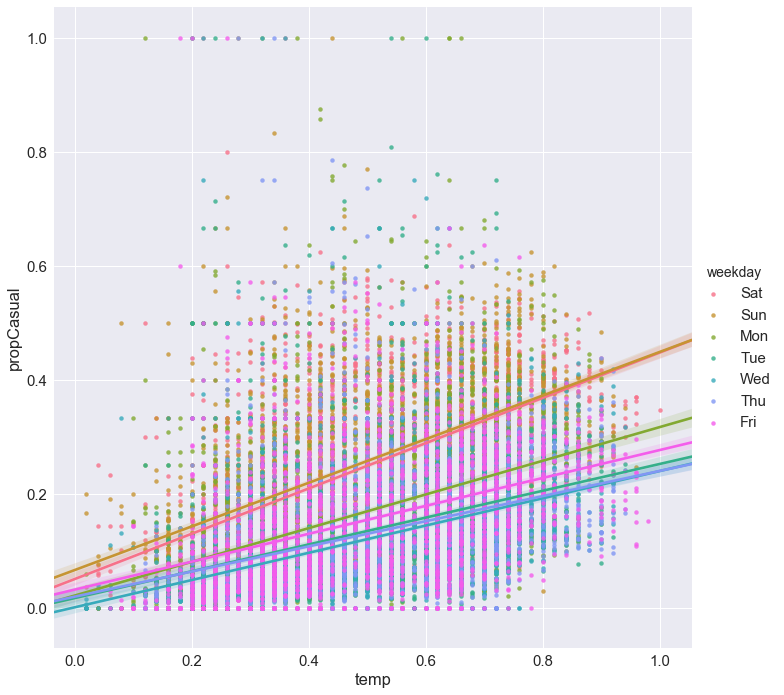

In [69]:
sns.lmplot(data=bike,x="temp",y="propCasual",hue="weekday",scatter_kws={"s": 20},size=10)

As you can see from the scatterplot, many points are overlapping. Though the plot can show some trends, it would be hard to verify your findings. Therefore we could fit some curves to summarize the data and plot the curves instead.

Basically you will need to make a plot like this: Fit and plot curves using data from different weekdays. 

<img src="curveplot_temp_propCasual.png" width=500px>

You will need to use the function [`statsmodels.nonparametric.smoothers_lowess.lowess`](http://www.statsmodels.org/dev/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html) to fit a curve from two sequences `x` and `y`. You may find the example below helpful.



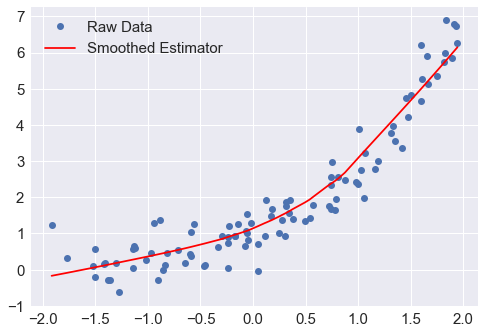

In [70]:
from statsmodels.nonparametric.smoothers_lowess import lowess
# Make noisy data
xobs = np.sort(np.random.rand(100)*4.0 -2)
yobs = np.exp(xobs) + np.random.randn(100)/2.0
plt.plot(xobs, yobs, 'o', label = "Raw Data")

# Predict 'smoothed' valued for observations
ysmooth = lowess(yobs, xobs, return_sorted=False)
plt.plot(xobs, ysmooth, 'r-', label ="Smoothed Estimator")
plt.legend()

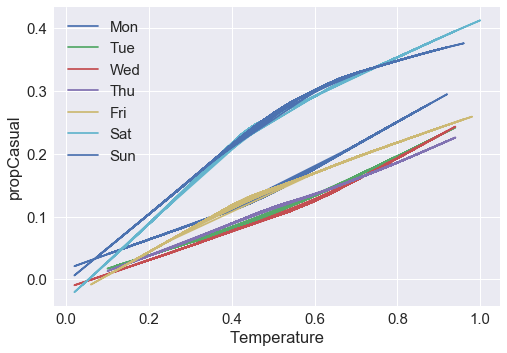

In [72]:
#Make some plots here...
from statsmodels.nonparametric.smoothers_lowess import lowess
x1= bike.loc[bike['weekday']=='Mon']['temp']
y1=bike.loc[bike['weekday']=='Mon']['propCasual']

x2=bike.loc[bike['weekday']=='Tue']['temp']
y2=bike.loc[bike['weekday']=='Tue']['propCasual']

x3= bike.loc[bike['weekday']=='Wed']['temp']
y3= bike.loc[bike['weekday']=='Wed']['propCasual']

x4= bike.loc[bike['weekday']=='Thu']['temp']
y4= bike.loc[bike['weekday']=='Thu']['propCasual']

x5= bike.loc[bike['weekday']=='Fri']['temp']
y5= bike.loc[bike['weekday']=='Fri']['propCasual']

x6= bike.loc[bike['weekday']=='Sat']['temp']
y6= bike.loc[bike['weekday']=='Sat']['propCasual']

x7= bike.loc[bike['weekday']=='Sun']['temp']
y7= bike.loc[bike['weekday']=='Sun']['propCasual']



y1smooth= lowess(endog= y1, exog= x1, return_sorted=False)
plt.plot(x1, y1smooth, label='Mon')
plt.legend()

y2smooth= lowess(endog= y2, exog= x2, return_sorted=False)
plt.plot(x2, y2smooth, label='Tue')
plt.legend()

y3smooth= lowess(endog= y3, exog= x3, return_sorted=False)
plt.plot(x3, y3smooth, label='Wed')
plt.legend()

y4smooth= lowess(endog= y4, exog= x4, return_sorted=False)
plt.plot(x4, y4smooth, label='Thu')
plt.legend()

y5smooth= lowess(endog= y5, exog= x5, return_sorted=False)
plt.plot(x5, y5smooth, label='Fri')
plt.legend()

y6smooth= lowess(endog= y6, exog= x6, return_sorted=False)
plt.plot(x6, y6smooth, label='Sat')
plt.legend()

y7smooth= lowess(endog= y7, exog= x7, return_sorted=False)
plt.plot(x7, y7smooth, label='Sun')
plt.legend()

plt.xlabel('Temperature')
plt.ylabel('propCasual')

#### Question 6c
What can you discover from the curve plot? How is the propCasual changing?

In [74]:
q6c_answer = r"""

From the curve plot we can determine that the propCasual increases on the weekend and increases for the most part as
the temperature goes up. It looks like if the graph were to keep going and the temperature were to get higher, the 
people would decrease, especially on the weekend. All of the days' attendance increase as the temperature goes up, 
but the weekend definitely has the biggest proportion of casual riders compared to the weekdays.

"""

display(Markdown(q6c_answer))



From the curve plot we can determine that the propCasual increases on the weekend and increases for the most part as
the temperature goes up. It looks like if the graph were to keep going and the temperature were to get higher, the 
people would decrease, especially on the weekend. All of the days' attendance increase as the temperature goes up, 
but the weekend definitely has the biggest proportion of casual riders compared to the weekdays.



## Submission

Run the cell below to run all the OkPy tests at once:

In [75]:
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("ok_tests") if q.startswith('q')]

Running all tests...
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now, run the cell below to submit your assignment to OkPy. The autograder should email you shortly with your autograded score. The autograder will only run once every 30 minutes.

**If you're failing tests on the autograder but pass them locally**, you should simulate the autograder by doing the following:

1. In the top menu, click Kernel -> Restart and Run all.
2. Run the cell above to run each OkPy test.

**You must make sure that you pass all the tests when running steps 1 and 2 in order.** If you are still failing autograder tests, you should double check your results.

In [76]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'hw3.ipynb'.
Submit... 100% complete
Submission successful for user: devyndonahue@berkeley.edu
URL: https://okpy.org/cal/ds100/fa17/hw3/submissions/5yv7AB
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit

